c:\anacoda\envs\pytorch\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\anacoda\envs\pytorch\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    20.19      4.79511e+19       24          2.78301          2.96965     14.23s
   1    15.93      5.59561e+15       24          2.74217          2.66264     13.89s
   2    16.49           401185       35          2.05967          2.10943     13.52s
   3    18.48      2.85827e+12       48           1.9101          2.08977     13.19s
   4    22.03      8.51105e+12       38          1.86388          2.51711     13.45s
   5    25.63      3.50541e+06       47          1.90049          2.43603     13.05s
   6    32.17      4.41297e+27       37          1.87675          2.62705     13.89s
   7    33.94      5.38606e+12       37          1.83915          2.98879     13.23s
   8    33.45      7.45608e+11       39          1.82773          3.31245  

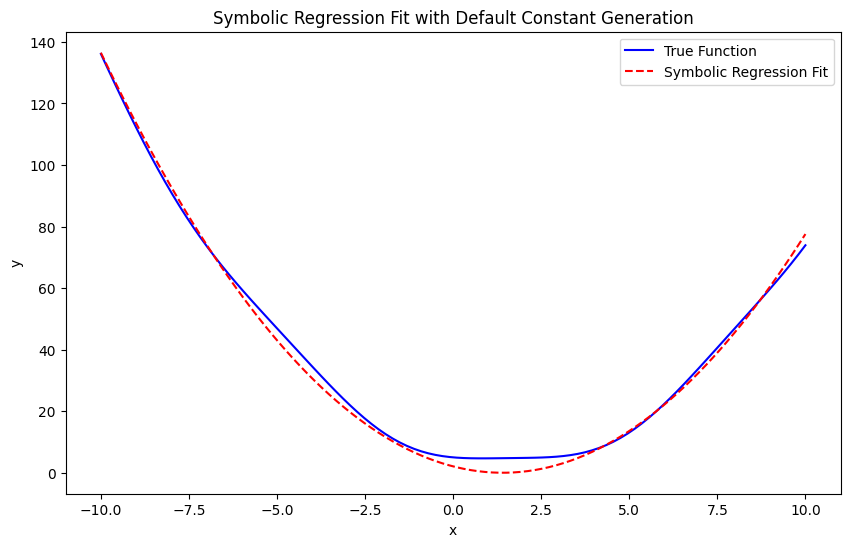

In [3]:
from gplearn.genetic import SymbolicRegressor
import numpy as np
from gplearn.functions import make_function
import matplotlib.pyplot as plt

# 生成数据
x = np.linspace(-10, 10, 100).reshape(-1, 1)
y = 2 * np.sin(x) + x**2 - 3 * x + 5  # 加入常数项 5

def power_two(x):
    return np.power(x, 2)

# 定义自定义函数
power_two_function = make_function(function=power_two, name="power2", arity=1)

# 限制符号函数的范围，包括自定义的幂次函数
function_set = ['add', 'sub', 'mul', 'sin', power_two_function]

# 定义符号回归模型
est_gp = SymbolicRegressor(
    population_size=1000,
    generations=40,
    stopping_criteria=0.01,
    function_set=function_set,
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.1,
    max_samples=0.9,
    verbose=1,
    parsimony_coefficient=0.01,
    random_state=0
)

# 拟合模型
est_gp.fit(x, y)

# 预测和绘图
y_pred = est_gp.predict(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="True Function", color="blue")
plt.plot(x, y_pred, label="Symbolic Regression Fit", color="red", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Symbolic Regression Fit with Default Constant Generation")
plt.show()


In [4]:
print("Generated expression:", est_gp._program)

Generated expression: power2(sub(add(add(X0, 0.252), sub(-0.734, 0.946)), mul(sub(0.431, X0), power2(0.156))))


$$
(((x0+0.252)+(-0.724-0.946))-(0.156^2-x0)\times0.156^2)^2
$$

In [5]:
import numpy as np
from gplearn.genetic import SymbolicRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 生成示例数据：y = x^3 + x^2 + x + 噪声
np.random.seed(0)
X = np.random.uniform(-5, 5, 1000).reshape(-1, 1)  # 生成1000个-5到5之间的随机数
y = X**3 + X**2 + X 

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 创建符号回归模型
est = SymbolicRegressor(
    population_size=5000,  # 每代个体数量
    generations=20,        # 进化代数
    stopping_criteria=0.01,# 当适应度达到0.01时停止
    p_crossover=0.7,       # 交叉概率
    p_subtree_mutation=0.1,# 子树变异概率
    p_hoist_mutation=0.05, # 提升变异概率
    p_point_mutation=0.1,  # 点变异概率
    max_samples=0.9,       # 使用90%样本进行训练
    verbose=1,             # 显示进化过程
    parsimony_coefficient=0.8,  # 调整惩罚系数
    function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'sin')  # 允许的运算符和函数
)

# 训练模型
est.fit(X_train, y_train)

# 预测测试集
y_pred = est.predict(X_test)

# 评估模型
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 输出结果
print(f"\n最佳表达式: {est._program}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


c:\anacoda\envs\pytorch\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\anacoda\envs\pytorch\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    19.04          222.389       63          9.89434          9.20675     42.72s
   1     4.93          36.0218        7          2.87738          3.00582     32.41s
   2     6.72          35.0863        7          2.85017          3.25066     32.07s
   3     9.77          56.1934        9          1.34733          1.37376     30.88s
   4     8.38          54.7846        9          1.33533          1.48182     27.85s
   5     7.21          65.0298       11          1.31631          6.23853     24.59s
   6     7.11          77.8671        9            1.342          1.42176     23.21s
   7     7.06           77.007        9          2.41953          2.41354     21.07s
   8     7.14          78.7612        9          2.40425          2.70852  

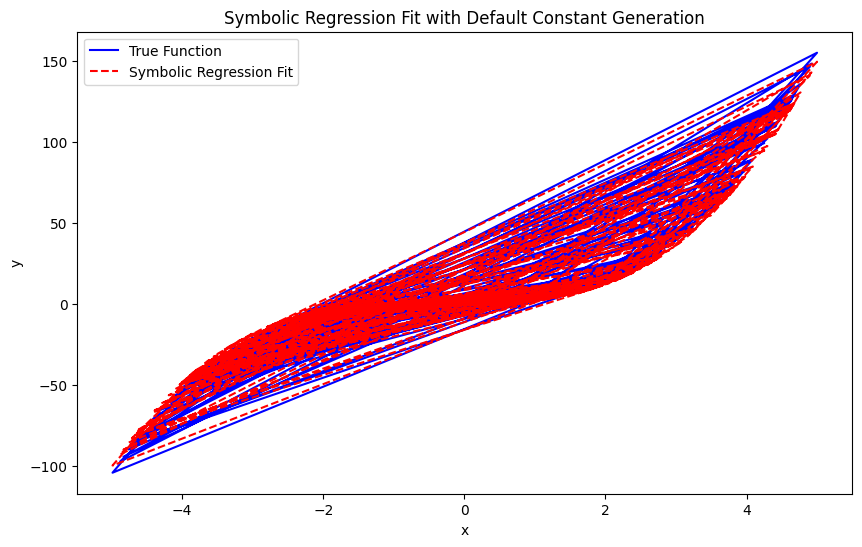

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, label="True Function", color="blue")
plt.plot(X_test, y_pred, label="Symbolic Regression Fit", color="red", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Symbolic Regression Fit with Default Constant Generation")
plt.show()